# Displaying and Comparing Quantitative Data
Can use same amazon dataset as before?

In this unit, I will cover the following:
- Representing Data (e.g., Table, Graph, Objects)
- ~~Frequency Table and Dot Plots~~
- ~~Histograms~~
- ~~Stem and Leaf Plots~~
- ~~Shapes of Distributions~~
- Line Graphs

### to-do's
- Lesson 1
- Lesson 2
- Lesson 3

## Preparation

Import the required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import arviz as az # has a dot plot method built in

## Displaying Quatitative Data with Graphs

In the previous unit we broke down the differences between two major types of variables, which you can find at this [link](unit_01.ipynb), so we will not go over the definition again in this notebook.

Instead we will dive right into several ways in which we can display quantitative data:

### to-do's
- ~~More documentation in histograms section~~
- ~~Figure out how to generate right skewed data (via a transform?)~~
- Bimodal data?
- ~~Annotate plots with ~~mean~~ and standard deviation? --> not as important~~
- Could be good to show how the mean and standard deviation changes with different transformations
- ~~Probably going to skip stem and leaf plots because I hate them~~
- ~~Confirm example for left skewed data~~
- Representing data
- Better narration of line graphs

### Frequency Tables and Dot Plots

Instead of using a dataset, I think it could be interesting to generate some random data to for these examples.

#### Frequency Table

In [3]:
# generate a random array of numbers between 1 and 10
_min = 0 # invclusive
_max = 11 # exclusive
_size = 100
random_array = np.random.randint(_min, _max, size=_size)
random_array

array([ 6,  9,  6,  6, 10,  0,  1,  4,  0, 10,  3,  1,  0,  0,  9,  5,  2,
       10,  5,  1,  7,  6,  1,  4,  9,  9,  2,  0,  1,  0,  8,  3,  2,  4,
        7,  9,  4, 10,  0,  3,  3,  4,  4,  5, 10, 10,  7,  9,  2,  9,  3,
       10,  9,  6,  5, 10,  5,  0,  5,  0, 10,  6,  8,  9, 10,  0,  0,  7,
        0,  7,  1,  0, 10,  9,  0,  9,  3, 10,  3, 10,  0,  0,  6,  1,  3,
        9,  5,  9,  8,  1,  2,  3,  7,  4, 10,  9,  7,  9,  7,  9])

In [4]:
# use the Counter class to quickly generate a dictionary
counted_values = Counter(random_array)
counted_values

Counter({9: 16, 0: 16, 10: 14, 3: 9, 1: 8, 7: 8, 6: 7, 4: 7, 5: 7, 2: 5, 8: 3})

In [5]:
# store as a dataframe to represent a frequency table
frequency_table = pd.DataFrame.from_dict(counted_values, orient='index').sort_index().reset_index()

# change the column names
frequency_table.columns = ['Number', 'Count']

# return the table
frequency_table

,Number,Count
0,0,16
1,1,8
2,2,5
3,3,9
4,4,7
5,5,7
6,6,7
7,7,8
8,8,3
9,9,16


#### Dot Plot

Using the ArviZ visualization library I found through stack overflow post, I found that they have a dot plot function built into their library. The documentation can be found [here](https://python.arviz.org/en/stable/index.html).

One draw back below is that there doesn't seem to be a way to add a y-axis, and there's no mention of the fact that the points on the graph are in units of 2 counts, and will round up (i.e., show a full dot) for odd frequencies.

Nevertheless, it's nice that there's a visualization software built on top of matplotlib that has simple syntax for building a this type of visualization.

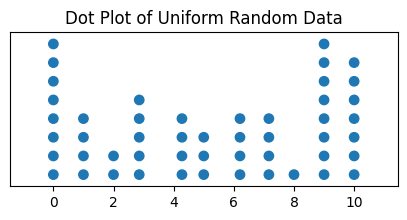

In [6]:
dot_plot = az.plot_dot(
    random_array,
    dotsize=.5,
    figsize=(5,2),
)

dot_plot.set_title('Dot Plot of Uniform Random Data');

### Histograms

Again, it could be fun to play around with some random data, so we will generate some more random data below.

We will generate random data from two types of distributions: *uniform* and *normal*. *Uniform* distributions define a set where each member of that set has an equal probability of being generated. A real life example of this that is often provided is a six-sided die. The probability that you would roll a 1, or a 2, or a 3 (and so on up to 6) is equally likely.

A set of numbers generated from a *normal* distributions are not equally likely. The values with the highest probability lie at the mean of the data, and drop off symmetrically as the magnitude of the difference between a member and the mean grows. However, the probability depends on the relative distance from the mean, not the absolute distance, as a distribution with a standard deviation of 1 is more likely to include a value of 1 if the average is 0, than if the standard deviation is .5. More specifics on this will be covered in later sections.

In [116]:
# This time we will want the minimum to be close to zero, but not exactly zero
_min = .1
_max = 10.1
_size = 1000000 # it will be good to have a large size to more closely match the distribution it's sampled from
rand_uniform = np.random.uniform(
    low=_min, 
    high=_max, 
    size=_size
    )

# generating normally distributed random data, with the same size as the array above
_loc = 5
_scale = 2
rand_normal = np.random.normal(
    loc=_loc, 
    scale=_scale, 
    size=_size
    )

#### Uniformly Distributed Data

What's important to note here is that the definitions supplied above are theoretical, and are expected to be achieve 'in theory' or at an infinite number of trials. We can see that even at a sample size of 1,000,000, that the experimental probabilities are not exactly equal. Regardless, as you increase the sample size, we will see that the relative differences in experimental probabilities approach 0.

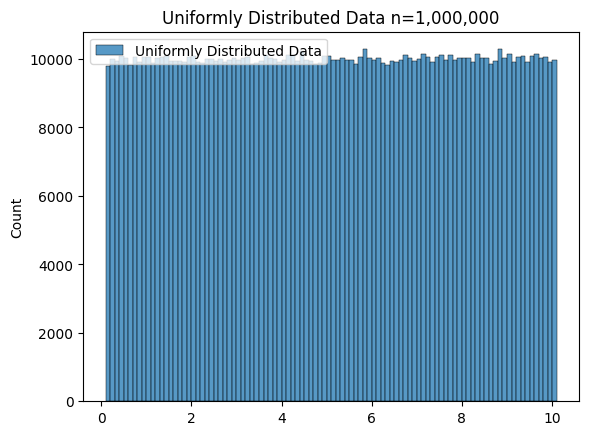

In [117]:
sns.histplot(
    rand_uniform
    )

plt.legend(
    labels = [ 
        'Uniformly Distributed Data'
        ]
    )

plt.title(f'Uniformly Distributed Data n={_size:,}');

#### Normally Distributed Data

An important property about normally distributed data, is that the data is symmetric around its mean. We see this pop up in nature when we consider the distribution of heights in humans (for example).

One way to tell if your data follows a normal distribution is to plot it and compare the mean and the median of the data. If these two metrics aren't equal, it suggests that your distribution is not normally distributed, and that it is *skewed* - more on that shortly.

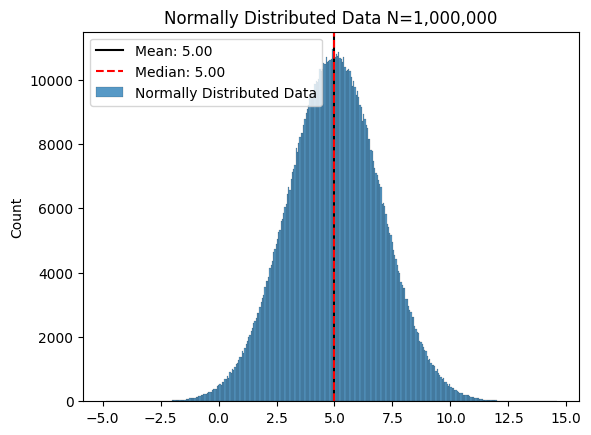

In [119]:
sns.histplot(
    rand_normal
)

plt.axvline(
    x=np.mean(rand_normal),
    color='k',
    )

plt.axvline(
    x=np.median(rand_normal),
    color='r',
    linestyle='--'
    )

plt.legend(
    labels = [
        f'Mean: {np.mean(rand_normal):.2f}', 
        f'Median: {np.median(rand_normal):.2f}', 
        'Normally Distributed Data'
        ]
    )

plt.title(f'Normally Distributed Data N={_size:,}');

#### Skewed Data

*Skewed* data, defines a distribution that is not symmetric around its mean. With this in mind, there are two kinds of *skewed* data: *right-skewed* and *left-skewed* data. The directions refers to which side the longest 'tail' lies. More on this below.

##### Right Skewed Data

As seen below, the data trails off to the right, meaning that there is an irregular amount of data that is greater than the mean. A popular example of this trend 'out in the wild' is of salaries. In the US, think of billionaires like Bill Gates and Warren Buffets, or millionaires like Robert Downey Jr. There are much fewer ultra rich, but they still exist in the data set and therefore *skew* the data to the right.

Depending on how far away from the mean/median these numbers are, we could consider them to be *outliers*.

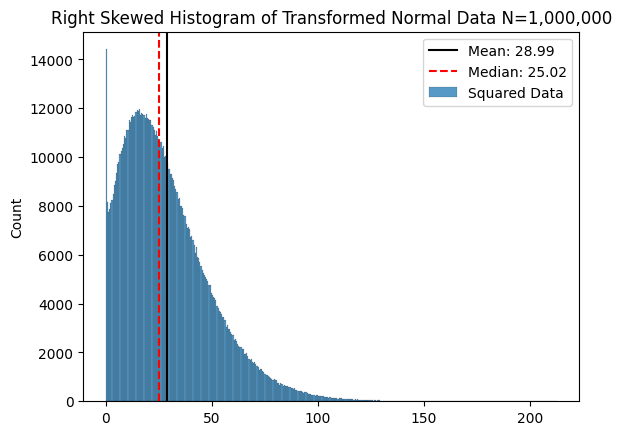

In [120]:
right_skewed = np.multiply(rand_normal,rand_normal)
sns.histplot(
    right_skewed
    )

plt.axvline(
    x=np.mean(right_skewed),
    color='k',
    )

plt.axvline(
    x=np.median(right_skewed),
    color='r',
    linestyle='--'
    )

plt.legend(
    labels = [
        f'Mean: {np.mean(right_skewed):.2f}', 
        f'Median: {np.median(right_skewed):.2f}', 
        'Squared Data'
        ]
    )


plt.title(f'Right Skewed Histogram of Transformed Normal Data N={_size:,}');

##### Left Skewed

*Left-skewed* data on the other hand have stragglers that are below the mean. Another real life example here could be life expectancy across countries. While the more developed and wealthy countries have access to better healthcare, there are some who aren't as fortunate, and are associated with lower life expectancy, so we would expect to see extremes on the left side/lower side of the mean.

Similarly to *right-skewed* data, depending on how far away from the mean/median a country's life expectancy is, it could be considered to be *outliers*.

In [123]:
# ensure all values are greater than 0 prior to transforming
negative_check = np.abs(np.min(rand_normal)) + 1
left_skewed = np.log(rand_normal + negative_check)

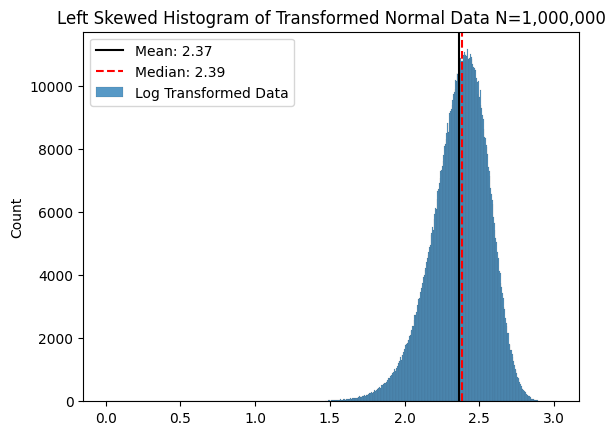

In [122]:
sns.histplot(
    left_skewed,    
)

plt.axvline(
    x=np.mean(left_skewed),
    color='k',
    )

plt.axvline(
    x=np.median(left_skewed),
    color='r',
    linestyle='--'
    )

plt.legend(
    labels = [
        f'Mean: {np.mean(left_skewed):.2f}', 
        f'Median: {np.median(left_skewed):.2f}', 
        'Log Transformed Data'
        ]
    )


plt.title(f'Left Skewed Histogram of Transformed Normal Data N={_size:,}');

### Line Graphs

Line graphs are defined by a string of connected points that implies a connection or a continuation of somekind between the data. This is why you will oftetimes find that line plots use some sort of time variable in their x-axis, because the graph is tacking how one variable changes over a given time. When this is the case, it would make sense to connect the dots, because we are measuring the same variable at distinct timepoints, and therefore are related.

It also tells which datapoint follows next. With example below, the first temp can't be connected to the last temp, because they are not in that order. 

Something to that effect.

Here we can look at average global temperatures normalized over several years.

https://climate.nasa.gov/vital-signs/ocean-warming/?intent=121
https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt


In [144]:
columns = []
data = {
    'Year': [],
    'No_Smoothing': [],
    'Lowess(5)': []
}
with open('Data/land_ocean_temperature_index.txt', 'r') as f:
    for i, line in enumerate(f.readlines()):
        if i > 4:
            row = line.split()
            data['Year'].append(int(row[0]))
            data['No_Smoothing'].append(float(row[1]))
            data['Lowess(5)'].append(float(row[2]))
        
        # print(i, line)
        
data = pd.DataFrame.from_dict(data)
data.head()

,Year,No_Smoothing,Lowess(5)
0,1880,-0.16,-0.09
1,1881,-0.08,-0.13
2,1882,-0.11,-0.16
3,1883,-0.17,-0.20
4,1884,-0.28,-0.24


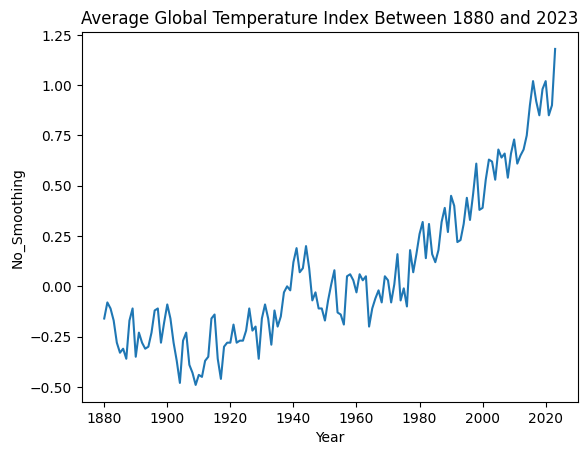

In [149]:
sns.lineplot(
    x=data['Year'],
    y=data['No_Smoothing']
)

plt.title(f'Average Global Temperature Index Between {data['Year'].min()} and {data['Year'].max()}');

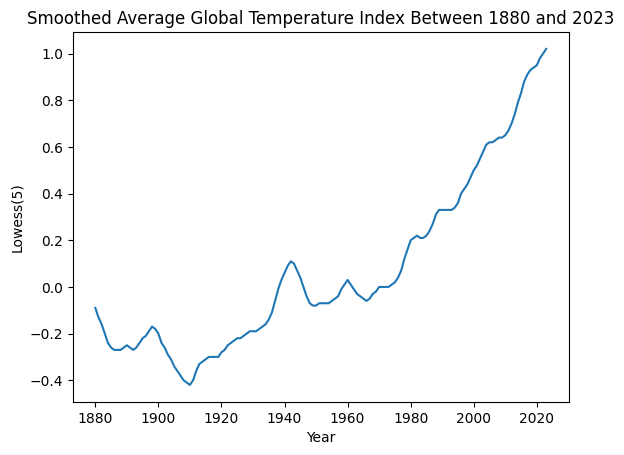

In [150]:
sns.lineplot(
    x=data['Year'],
    y=data['Lowess(5)']
)

plt.title(f'Smoothed Average Global Temperature Index Between {data['Year'].min()} and {data['Year'].max()}');